# <span> Laboratorio di Simulazione Numerica  </span>
## <span> Esercitazione 9 </span>

### Esercizio 09.1

In questo esercizio viene implementato l'<b>Algoritimo Genetico</b> (GA) per risolvere numericamente il problema del commesso viaggiatore. Si tratta di un problema di ottimizzazione in cui, dato un insieme di 32 città, si vuole trovare il percorso di minima lunghezza che le collega, visitando ogni città una ed una sola volta, fino a ritornare alla città di partenza. In particolare si vuole trovare il percorso che minimizza la seguente funzione di costo

$$ L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$$

Il problema del commesso viaggiatore viene applicato a due casi:
1. Città distribuite casualmente su una circonferenza

2. Città distribuite casualemente all'interno di un quadrato

Per implementare il codice dell'algoritmo si utilizza la programmazione a oggetti di C++. Innanzitutto è stata creata la classe <b>Chromosome</b>. Tra i membri privati segnaliamo: un vettore di interi, che conterrà la sequenza di città nell'ordine in cui queste vengono visitate dal commesso viaggiatore, ovvero una possibile soluzione del problema; una matrice in cui vengono salvate le distanze fra le città, che servirà per calcolare la lunghezza del particolare percorso seguito dal commesso viaggiatore. Il costruttore di tale classe genera una sequenza ordinata di città; successivamente, attraverso il Fisher-Yates shuffle, le città vengono permutate in modo casuale. Vengono inoltre implementati due metodi per generare casualmente le posizioni delle città nei due casi. Nella stessa classe sono stati costruiti i seguenti algoritmi di mutazione dei cromosomi: 

- <span><b>Swap</b>: scambia due città selezionate in modo casuale </span>
- <span><b>Inversion</b>: seleziona un numero casuale di città contigue e ne inverte l'ordine </span>
- <span><b>Shift</b>: spostamento di un numero casuale di città di un numero casuale di posizioni </span>
- <span><b>Cycle</b>: permutazione ciclica di un numero casuale di città città </span>
- <span><b>Swap_Sequence</b>: scambia due sequenze di un numero casuale di città  </span>

In tutti i metodi si fa attenzione a far sì che tutte le città compaiono una ed una solta volta all'interno del cromosoma. Inoltre, per diminuire la degenerazione di percorsi equivalenti, la città di partenza viene sempre mantenuta nella prima componente del cromosoma. Per verificare che queste condizioni vengano rispettate viene implementata la funzione <b>Check</b>, utilizzata solamente in una fase iniziale di debug del codice.
<br> <br>
Si ha poi la classe <b>Population</b>, che tra i membri privati contiene un vettore di cromosomi, che rappresenta la popolazione di possibili soluzioni. All'interno di questa classe viene implementato l'algoritmo genetico. Innanzitutto sono presenti due metodi che consentono di generare in modo casuale le popolazioni iniziali nei due casi del problema. Una volta generata la prima popolazione, i cromosomi al suo intenro vengono immediatamente ordinati per costo crescente. Tramite il metodo <b>New_Pop</b> viene creata la nuova popolazione, eseguendo, nell'ordine in cui vengono riportate, tre operazioni:

- <span><b>Selezione</b>: vengono selezionati due cromosomi genitori. Per privilegiare i cromosomi con costo minore, vengono selezionati i cromosomi in posizione $j=int(Nr^p)$, dove $r$ numero casuale distribuito uniformemente nell'intervallo $[0,1)$, $N$ è la dimensione della popolazion e $p$ è un esponente adatto al nostro scopo. Si riserva la possibilità di scegliere l'esponente $p$, inserendolo come membro privato della classe. Nella simulazione si è scelto $p=2$. </span>
- <span><b>Crossover</b>: i due cromosomi genitori si scambiano il materiale genetico con una probabilità dell' $80\%$ per dare origine ai due cromosomi figli. Ogni figlio è uguale a uno dei due genitori fino a una posizione che viene estratta casualmente; viene poi completato il cromosoma figlio inserendo le città mancanti nell'ordine in cui compaiono nell'altro genitore. Qualora il crossover non avvenga i figli saranno uguali ai genitori. </span>
- <span><b>Mutazioni</b>: i due cromosomi figli subiscono delle modifiche con una probabilità pari al $5\%$ nel caso della circonferenza e pari all'$8\%$ nel caso del quadrato. Queste consentono di aggiungere diversità alla popolazione, permettendo di uscire dai minimi locali. </span> 

Queste tre operazioni vengono ripetute finché non viene creata una intera nuova popolazione di cromosomi, che andrà a sostituire la vecchia popolazione. La nuova popolazione viene immediatamente ordinata sulla base della funzione di costo.

Nella simulazione è stata utilizzata una popolazione di $100$ cromosomi. In entrambi i casi viene mostrato il percorso migliore e l'andamento della lunghezza del percorso migliore e della lunghezza media del percorso della metà migliore della popolazione all'aumentare del numero di generazioni.

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

%config InlineBackend.figure_format = 'retina'

In [2]:
# carico dati - circonferenza
x_circ, y_circ = np.loadtxt("9.1/init_circ.dat", usecols=(1,2), delimiter=' ', unpack='true')
bp_length_c = np.loadtxt("9.1/bp_length_circle.out", usecols=(1), unpack='true')
half_ave_c = np.loadtxt("9.1/half_length_circle.out", unpack='true')

best_path_c = np.append(np.loadtxt("9.1/final_path_circle.out").astype(int),0) 
# best path è così un array di interi con la città di partenza come primo ed ultimo elemento

# costruisco un vettore con le posizioni delle città nell'ordine in cui queste compaiono in best path
xc_final = np.zeros(best_path_c.size)
yc_final = np.zeros(best_path_c.size)

for i in range (best_path_c.size):
    xc_final[i] = x_circ[best_path_c[i]]
    yc_final[i] = y_circ[best_path_c[i]]

#### Città su una circonferenza di raggio $R=1$

Sono state effettuate $1000$ generazioni e il miglior percorso è stato trovato dopo $185$ generazioni. In questo caso è possibile verificare l'effettiva convergenza dell'algoritmo al minimo globale, in quanto si conosce il percorso di minima lunghezza.

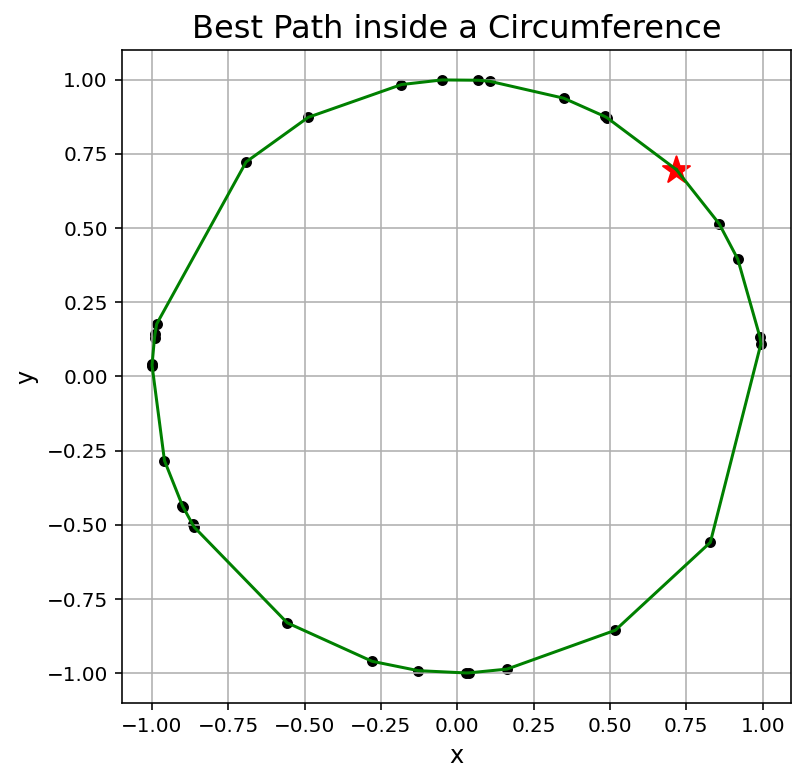

       ###### GA - Circumference ######
       ### Best path length: 6.2403 ###
       ################################


In [3]:
plt.figure(figsize=(6,6))
plt.scatter(x_circ, y_circ, s=20, c="black")
plt.scatter(x_circ[0], y_circ[0], marker="*", s=200,  c="red")
plt.plot(xc_final, yc_final, c="green")
plt.title('Best Path inside a Circumference', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.show()

print("       ###### \033[4mGA - Circumference\033[0m ######")
print("       ### Best path length:\033[1m", bp_length_c[-1], "\033[0m###")
print("       ################################")

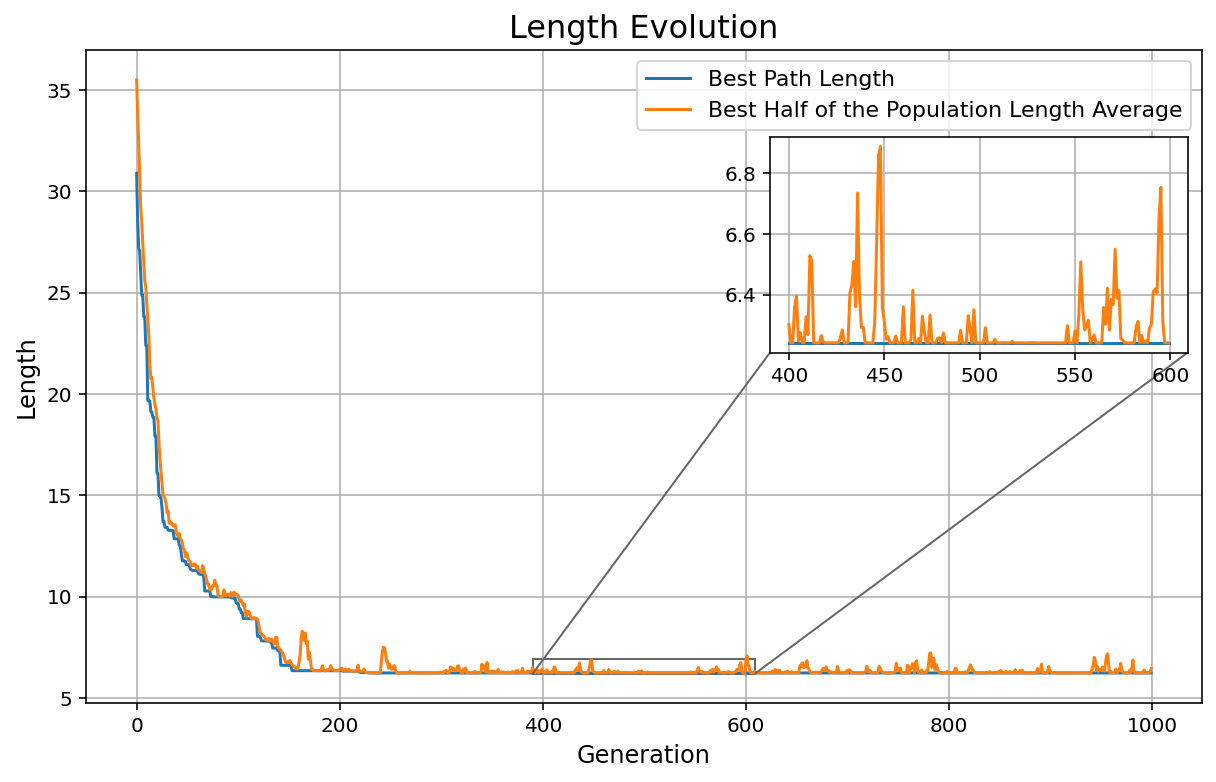

In [4]:
x = np.arange(400, 600, 1)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(bp_length_c, label="Best Path Length")
ax.plot(half_ave_c, label="Best Half of the Population Length Average")
ax.set_xlabel('Generation', fontsize=12)
ax.set_ylabel('Length', fontsize=12)
ax.set_title('Length Evolution', fontsize=16)
ax.legend(loc='best', fontsize=11)
ax.grid(True)

# posizione regione ingrandita
sub_axes = plt.axes([.6, .53, .29, .25]) 
# plot regione ingrandita
sub_axes.plot(x, bp_length_c[400:600])
sub_axes.plot(x, half_ave_c[400:600])
sub_axes.grid(True)
mark_inset(ax, sub_axes, loc1=3, loc2=4, ec='0.4')

plt.show()

Si può notare una convergenza rapida a percorsi di lunghezza breve, che però sono minimi locali; grazie alla presenza delle mutazioni l'algoritmo è in grado di arrivare al minimo globale. La lunghezza media segue l'andamento della lunghezza del miglior cammino; tuttavia, sono presenti alcune generazioni in cui si osservano dei picchi: questo effetto è dovuto alle mutazioni, infatti aumentando la probabilità delle mutazioni al $10\%$ la lunghezza media presenta molte più oscillazioni.

#### Città in un quadrato di lato $L=1$

Sono state effettuate $2000$ generazioni e il miglior percorso è stato trovato dopo $1205$ generazioni. Anche aumentando di un fattore $10$ il numero di generazioni il miglior percorso rimane quello trovato, facendo presupporre che si possa trattare del minimo globale.

In [5]:
# carico dati - quadrato
x_square, y_square = np.loadtxt("9.1/init_square.dat", usecols=(1,2), delimiter=' ', unpack='true')
bp_length_s = np.loadtxt("9.1/bp_length_square.out", usecols=(1), unpack='true')
half_ave_s = np.loadtxt("9.1/half_length_square.out", unpack='true')

best_path_s =np.append( np.loadtxt("9.1/final_path_square.out").astype(int),0)

xs_final = np.zeros(best_path_s.size)
ys_final = np.zeros(best_path_s.size)

for i in range (best_path_s.size):
    xs_final[i] = x_square[best_path_s[i]]
    ys_final[i] = y_square[best_path_s[i]]

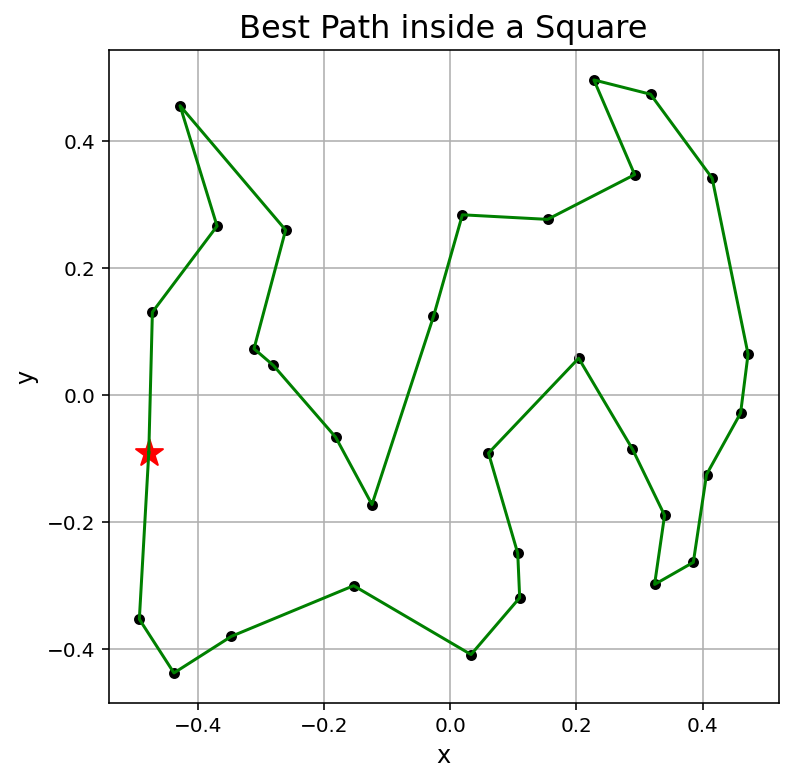

       ########## GA - Square ##########
       ### Best path length: 5.08796 ###
       #################################


In [6]:
plt.figure(figsize=(6,6))
plt.scatter(x_square, y_square, s=20, c="black")
plt.scatter(x_square[0], y_square[0], marker="*", s=200,  c="red")
plt.plot(xs_final, ys_final, c="green")
plt.title('Best Path inside a Square', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.show()

print("       ########## \033[4mGA - Square\033[0m ##########")
print("       ### Best path length:\033[1m", bp_length_s[-1], "\033[0m###")
print("       #################################")

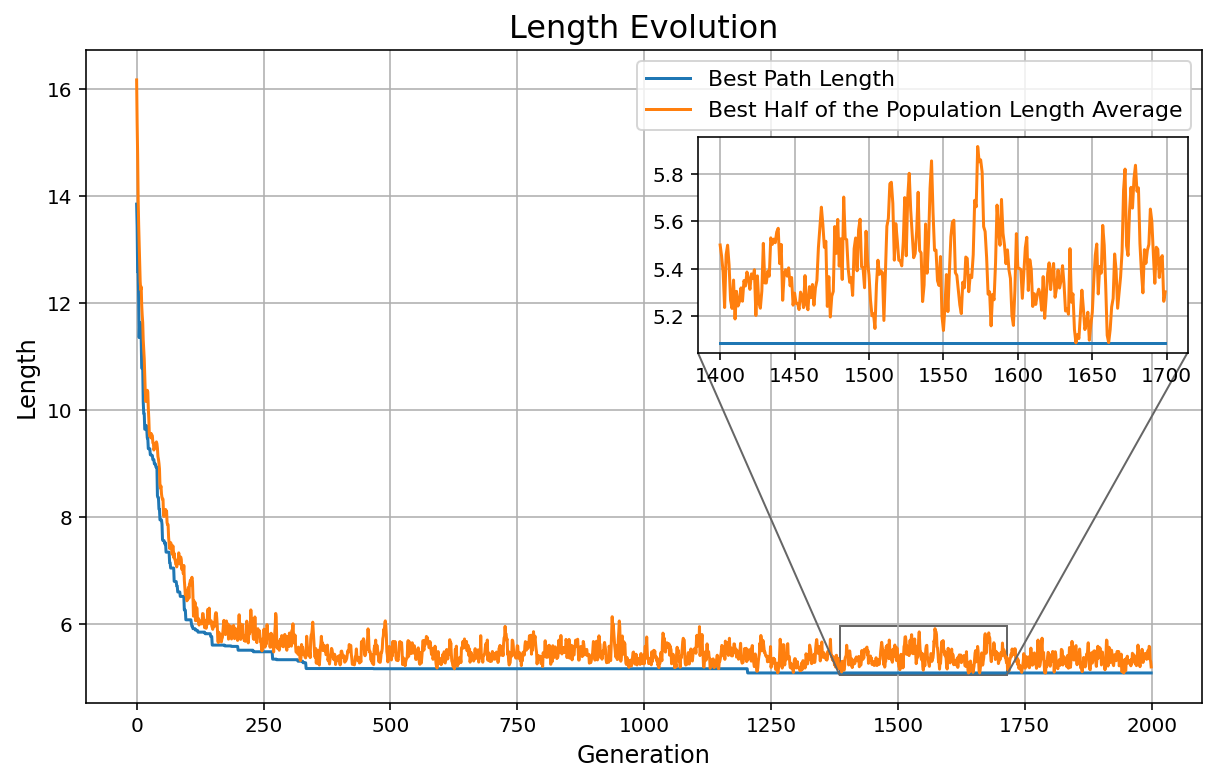

In [7]:
x = np.arange(1400, 1700, 1)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(bp_length_s, label="Best Path Length")
ax.plot(half_ave_s, label="Best Half of the Population Length Average")
ax.set_xlabel('Generation', fontsize=12)
ax.set_ylabel('Length', fontsize=12)
ax.set_title('Length Evolution', fontsize=16)
ax.legend(loc='best', fontsize=11)
ax.grid(True)

# posizione regione ingrandita
sub_axes = plt.axes([.55, .53, .34, .25]) 
# plot regione ingrandita
sub_axes.plot(x, bp_length_s[1400:1700])
sub_axes.plot(x, half_ave_s[1400:1700])
sub_axes.grid(True)
mark_inset(ax, sub_axes, loc1=3, loc2=4, ec='0.4')

plt.show()

Come anticipato avendo aumentato la probabilità delle mutazioni, la lunghezza media della metà migliore della popolazione presenta molte oscillazioni, anche se queste rimangono contenute.

In entrambi i casi, eseguendo diverse volte l'algoritmo genetico, si può notare come il numero di generazioni necessarie per trovare il miglior percorso dipenda sia dalla dimensione della popolazione sia dalle probabilità del crossover e delle mutazioni. 